In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data=pd.read_csv("C:\\Users\\HP\\Downloads\\archive (2)\\gld_price_data.csv")

In [4]:
gold_data.head()
#spx=stock value,gld=gold price,uso=unites state oil,slv=silver price value,eur/usd=currency

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

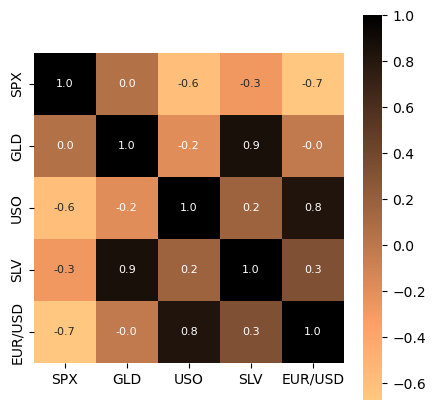

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='copper_r')

In [19]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

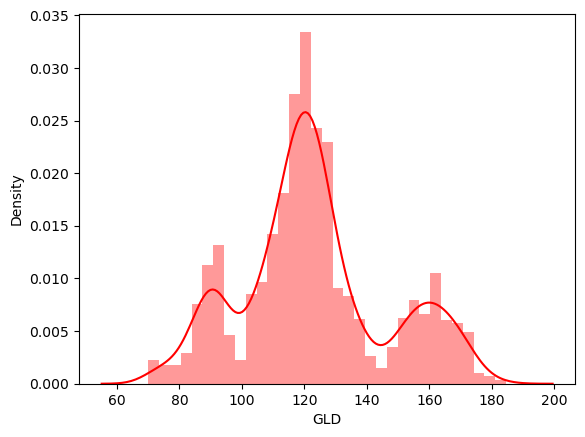

In [25]:
sns.distplot(gold_data['GLD'],color='r')

In [27]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
test_data_prediction = regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.30989933  81.68539997 115.55020023 127.69750105 120.8599013
 154.65319752 150.61609868 126.14000031 117.38459887 126.13700083
 116.76410102 171.08810105 141.48709846 167.68519863 115.22580017
 117.60920051 139.48390262 170.06500031 160.25900353 160.82019965
 155.15950037 125.21980007 176.49270032 157.75430287 125.13860031
  93.82819975  77.6591001  120.40970016 119.08539935 167.45670011
  88.2499003  125.3266005   90.97010082 117.55950053 121.11189928
 136.94990071 115.53980075 115.49350105 146.59279968 107.39750087
 104.07960241  87.34389808 126.46410078 118.1235002  154.01149888
 119.78939992 108.37379994 107.98619806  93.14900062 127.1852978
  75.6176     113.62459933 121.27359999 111.08409936 118.81339911
 120.51879926 158.83350058 167.97460127 147.09979736  85.86909878
  94.36540008  86.91019851  90.56050034 118.91770068 126.50250024
 127.49850006 170.29979977 122.30579924 117.45399902  98.80730005
 168.39880086 142.80659841 131.88400221 121.2142023  120.6032997
 119.83950046

In [42]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9892098267849905


In [46]:
Y_test = list(Y_test)

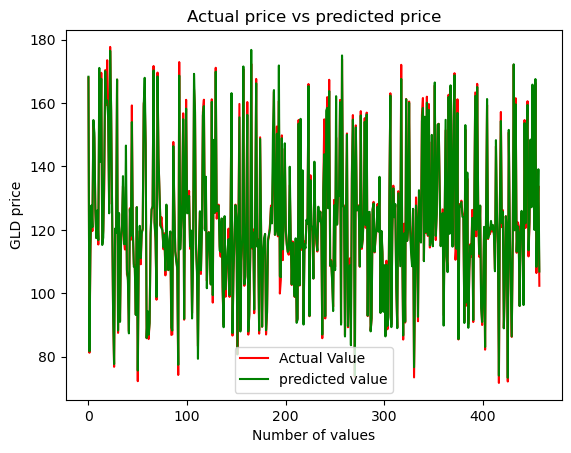

In [52]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()